# Wind_Turbine_Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data Loading & Initial Overview

## 1.1 Data Loading

In [3]:
line_start = '\033[4m'
bold_start = '\033[1m'
style_end   = '\033[0m'
bullet_start = '\u2022 '
trait_start = '- '

In [4]:
%run '/content/drive/My Drive/Colab Notebooks/data_utils.ipynb'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [5]:
wind_turbine = load_data('/content/drive/My Drive/Colab Notebooks/wind_turbine.csv',24000000,'ISO-8859-1',None)

## 1.2 Initial EDA

In [6]:
check(wind_turbine, 10)

,Datetime,RotorSpeed,GeneratorSpeed,GeneratorTemperature,WindSpeed,PowerOutput,SpeiseSpannung,StatusAnlage,MaxWindHeute,offsetWindDirection,PitchDeg
0,2021-12-31 23:00:00.647,0.0,0.0,11.6,0.0,0.0,27.8,13.0,0.0,21.0,80.313994
1,2021-12-31 23:00:01.647,0.0,0.0,11.6,0.0,0.0,27.8,13.0,0.0,13.0,80.313994
2,2021-12-31 23:00:02.647,0.0,0.0,11.6,0.0,0.0,27.8,13.0,0.0,12.0,80.313994
3,2021-12-31 23:00:03.650,0.0,0.0,11.6,0.0,0.0,27.8,13.0,0.0,12.0,80.313994
4,2021-12-31 23:00:04.650,0.0,0.0,11.6,0.0,0.0,27.8,13.0,0.0,12.0,80.313994
5,2021-12-31 23:00:05.653,0.0,0.0,11.6,0.0,0.0,27.8,13.0,0.0,12.0,80.313994
6,2021-12-31 23:00:06.651,0.0,0.0,11.6,0.0,0.0,27.8,13.0,0.0,23.0,80.313994
7,2021-12-31 23:00:07.652,0.0,0.0,11.6,0.0,0.0,27.8,13.0,0.0,24.0,80.313994
8,2021-12-31 23:00:08.643,0.0,0.0,11.6,0.0,0.0,27.8,13.0,0.0,13.0,80.313994
9,2021-12-31 23:00:09.644,0.0,0.0,11.6,0.0,0.0,27.8,13.0,0.0,23.0,80.313994


In [7]:
size(wind_turbine)

(24000000, 11)

In [8]:
initial_eda(wind_turbine, datetime_column='Datetime')

----- Data Overview -----
Dataset Shape: (24000000, 11)
Column Names: ['Datetime', 'RotorSpeed', 'GeneratorSpeed', 'GeneratorTemperature', 'WindSpeed', 'PowerOutput', 'SpeiseSpannung', 'StatusAnlage', 'MaxWindHeute', 'offsetWindDirection', 'PitchDeg']
Data Types:
 Datetime                 object
RotorSpeed              float64
GeneratorSpeed          float64
GeneratorTemperature    float64
WindSpeed               float64
PowerOutput             float64
SpeiseSpannung          float64
StatusAnlage            float64
MaxWindHeute            float64
offsetWindDirection     float64
PitchDeg                float64
dtype: object

Preview of Data:
                   Datetime  RotorSpeed  GeneratorSpeed  GeneratorTemperature  \
0  2021-12-31 23:00:00.647         0.0             0.0                  11.6   
1  2021-12-31 23:00:01.647         0.0             0.0                  11.6   
2  2021-12-31 23:00:02.647         0.0             0.0                  11.6   
3  2021-12-31 23:00:03.650    

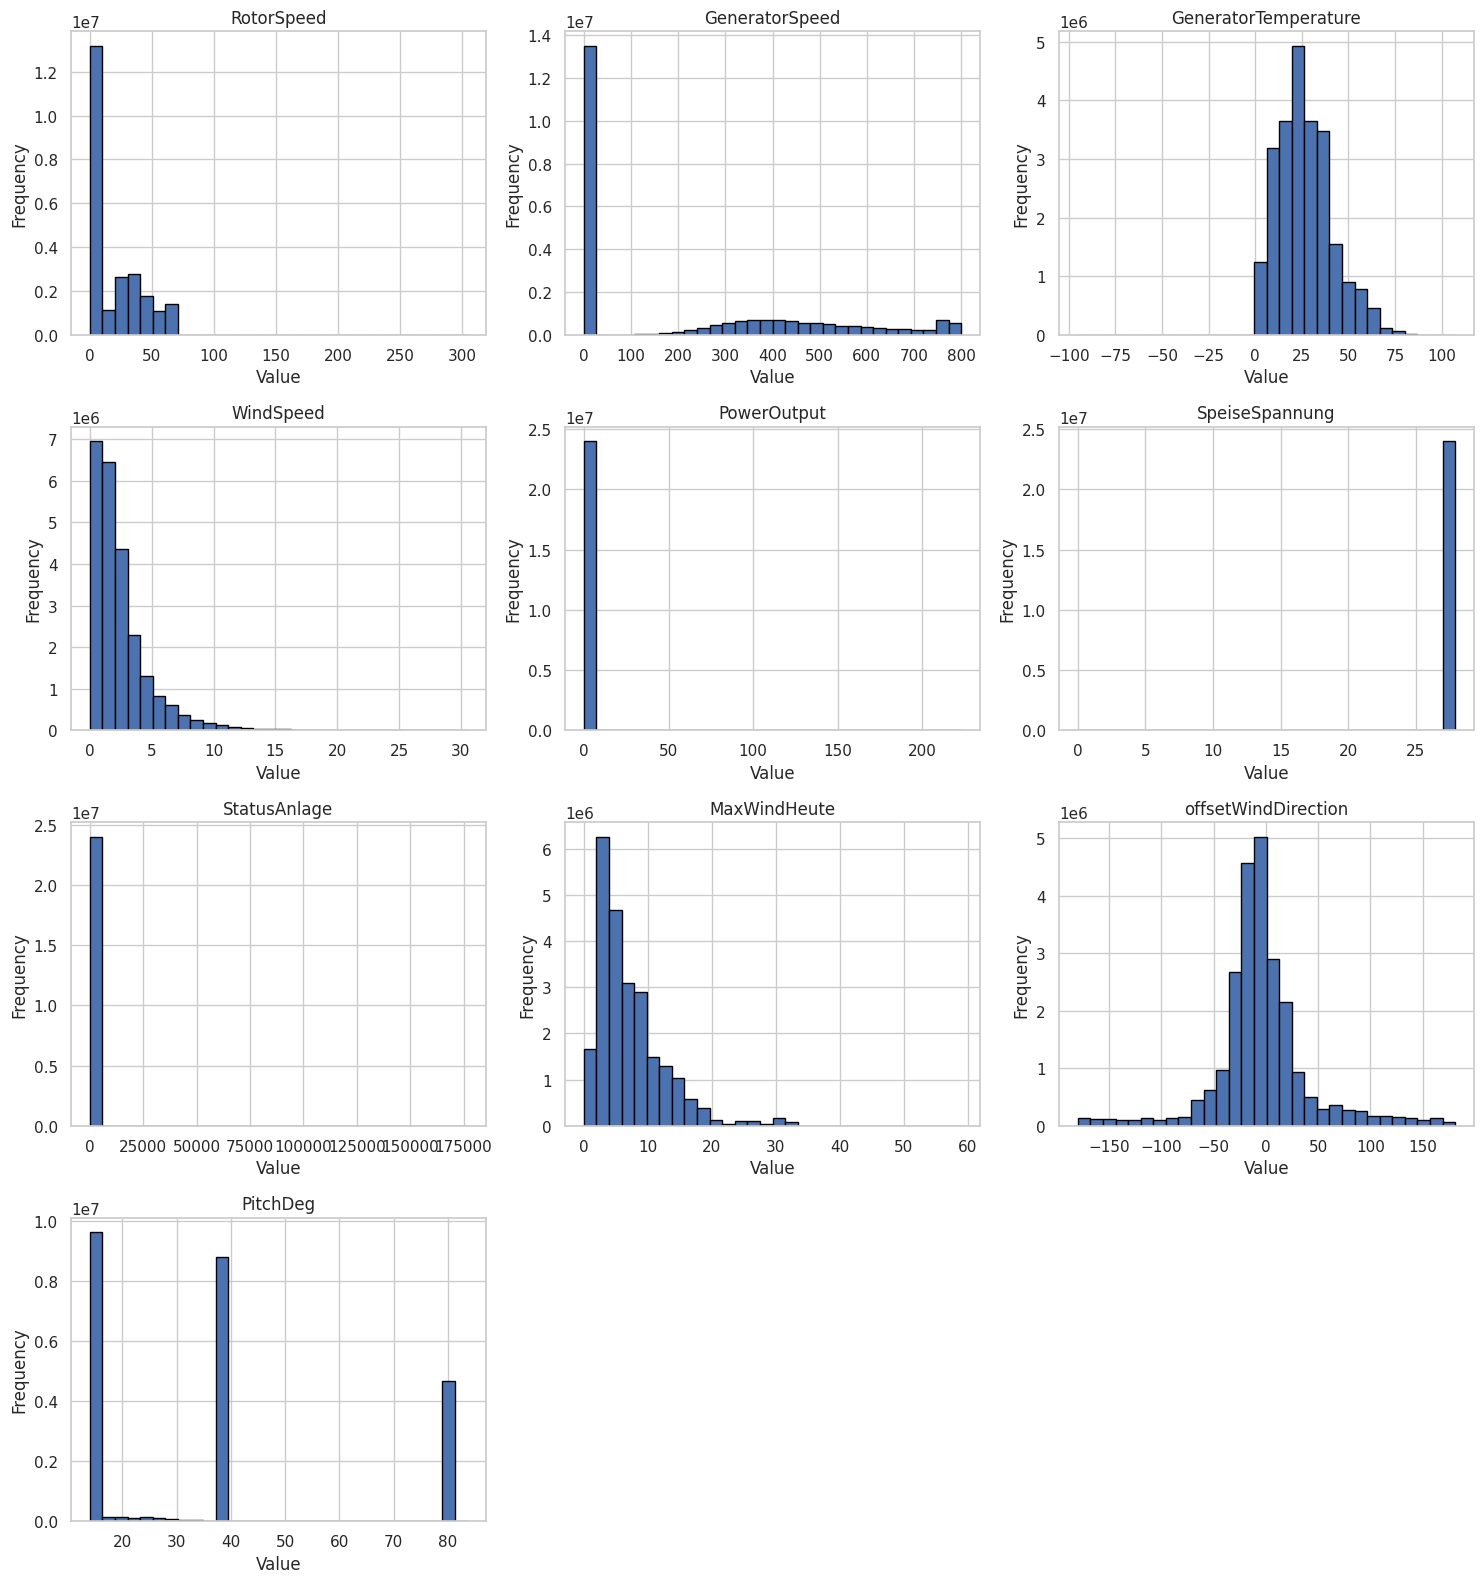

In [9]:
plot_numeric_histograms(wind_turbine)

<ipython-input-4-2724ef037ba4>:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  entry_counts = data[date_column].dt.to_period(period).value_counts().sort_index()


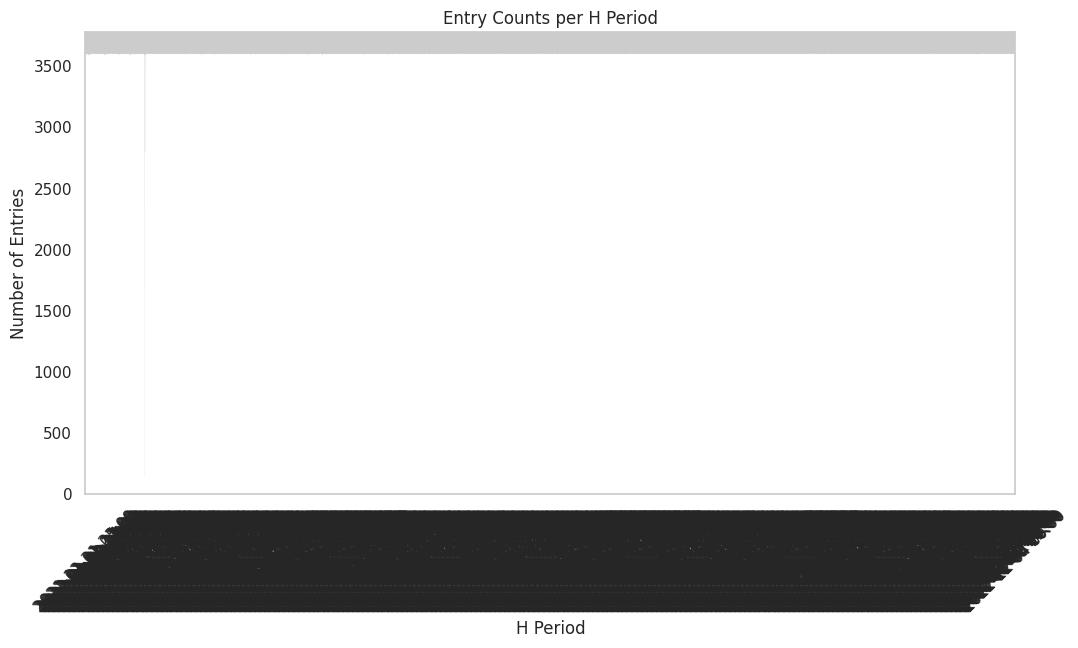

In [10]:
plot_entry_counts(wind_turbine, date_column='Datetime', period='H')

## Key Observations

**Upon initial exploration of this wind turbine dataset, a few critical insights emerge:**

- **High Frequency and Volume**: The dataset contains 24 million records, collected at a per-second interval, providing granular insights into turbine operations over an extended period. This high resolution is useful for capturing real-time performance patterns but introduces significant computational overhead for analysis.

- **High Concentration of Zero Values:** Columns like RotorSpeed, GeneratorSpeed, and PowerOutput have a high concentration of zero values, suggesting potential periods of turbine inactivity (downtime). This could be due to factors like low wind conditions or operational pauses. Retaining these zero values as an indication of downtime will be important for accurately assessing turbine performance patterns.

- **Significant Outliers:** Features such as GeneratorSpeed and PowerOutput contain extreme outlier values, which may result from capturing brief spikes in turbine activity. These outliers need to be carefully managed, likely through robust scaling or alternative normalization techniques, to prevent them from skewing analysis results.

- **Limited Unique Values in Certain Features:** Some columns, like SpeiseSpannung, have very few unique values, which might indicate that they don't contribute meaningful variability. These columns could potentially be removed if they are deemed non-informative, simplifying the dataset without losing critical information.

- **Potential Feature Correlations:** Based on domain understanding, we expect correlations between features such as GeneratorSpeed and RotorSpeed, or WindSpeed and PowerOutput. Validating these relationships can help in reducing redundant features and focusing on the most predictive ones.

- **Date Range and Temporal Consistency:** The dataset spans a period from late 2021 to late 2022, covering various seasonal and weather conditions, which may affect turbine performance. Ensuring consistent temporal data will be essential for accurate time-series analysis.

These insights guide us toward a preprocessing approach that emphasizes handling zero-value downtime, managing outliers, and evaluating feature relevance. Moving forward, we’ll focus on structuring the dataset in a way that preserves meaningful information while optimizing it for efficient modeling and analysis.

# 2. Data Preprocessing

## 2.1 Datetime Resampling (Hourly Aggregation)

In [11]:
def preprocess_datetime(data, date_column='Datetime'):
    # Convert Datetime column to datetime object and set it as the index
    data[date_column] = pd.to_datetime(data[date_column], errors='coerce')
    data.dropna(subset=[date_column], inplace=True)  # Drop rows with invalid datetime
    data.set_index(date_column, inplace=True)
    return data

In [12]:
wind_turbine = preprocess_datetime(wind_turbine)

In [13]:
wind_turbine = wind_turbine.resample('H').mean()

<ipython-input-13-607f915cabf3>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  wind_turbine = wind_turbine.resample('H').mean()


## 2.2 Handeling Missing Values

### 2.2.1 Power_Output's Case

In [14]:
def fill_missing_power_output(data, target_column='PowerOutput'):
    # Forward-fill for consecutive NaNs within each minute interval
    data[target_column].fillna(method='ffill', inplace=True)
    # Interpolate remaining NaNs linearly
    data[target_column].interpolate(method='linear', inplace=True)
    return data

In [15]:
wind_turbine = fill_missing_power_output(wind_turbine)


<ipython-input-14-d6692b58437c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[target_column].fillna(method='ffill', inplace=True)
<ipython-input-14-d6692b58437c>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[target_column].fillna(method='ffill', inplace=True)
<ipython-input-14-d6692b58437c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Th

In [16]:
check(wind_turbine,100)

,RotorSpeed,GeneratorSpeed,GeneratorTemperature,WindSpeed,PowerOutput,SpeiseSpannung,StatusAnlage,MaxWindHeute,offsetWindDirection,PitchDeg
Datetime,,,,,,,,,,
2021-12-31 23:00:00,0.128476,0.0,11.410095,0.010011,0.0,27.8,13.0,0.289572,8.953003,80.313994
2022-01-01 00:00:00,0.964534,0.0,10.643004,0.140473,0.0,27.8,13.0,0.444673,-5.931572,80.313994
2022-01-01 01:00:00,0.194438,0.0,10.613765,0.070106,0.0,27.8,13.0,2.200000,8.355673,80.313994
2022-01-01 02:00:00,0.794549,0.0,10.107814,0.052058,0.0,27.8,13.0,2.200000,-7.882925,80.313994
2022-01-01 03:00:00,0.010484,0.0,9.638459,0.002503,0.0,27.8,13.0,2.200000,10.609010,80.313994
...,...,...,...,...,...,...,...,...,...,...
2022-01-04 22:00:00,0.673357,0.0,13.031208,0.448079,0.0,27.8,13.0,17.157823,10.572661,80.563784
2022-01-04 23:00:00,0.684271,0.0,11.405596,0.948246,0.0,27.8,13.0,5.700000,-10.723552,80.314983
2022-01-05 00:00:00,2.276377,0.0,10.487590,0.210796,0.0,27.8,13.0,5.700000,1.814135,80.313994


**Decision:**

After trying to fix the power_output variable's values disperency accross the dataset, we determined that this feature is extremly hard to fix and fixing its disperency would result a completly different dataset structure thus impacting in real infoormation about seasonality and trend captured by the other variables. This variable is not considered as our Target variable anymore and for that reason we will utilize a proxy, "RotorSpeed"

### 2.2.2 Handling Missing Values in Rest of Features

In [17]:
def resample_with_missing_handling(data, freq, non_zero_columns):
    """
    Handles missing values during resampling by applying non-zero mean for specific columns and filling others with a
    generic method.

    Parameters:
    - data (DataFrame): The DataFrame to process.
    - freq (str): Resampling frequency (e.g., 'H' for hourly).
    - non_zero_columns (list): Columns to apply non-zero mean calculation.

    Returns:
    - DataFrame: Resampled DataFrame with missing values handled.
    """
    def custom_resample(series):
        if series.name in non_zero_columns:
            non_zero_values = series[series != 0]
            return non_zero_values.mean() if len(non_zero_values) > 0 else 0
        else:
            return series.mean()

    # Resample and handle missing values for non-zero and other columns
    resampled = data.resample(freq).apply(custom_resample)
    resampled.fillna(method='ffill', inplace=True)  # Forward-fill remaining NaNs
    resampled.fillna(method='bfill', inplace=True)  # Backward-fill if necessary
    return resampled


In [18]:
# Specify columns that should use non-zero mean calculation
non_zero_columns = ['RotorSpeed', 'GeneratorSpeed', 'PowerOutput']
wind_turbine = resample_with_missing_handling(wind_turbine, 'H', non_zero_columns)
missing_summ(wind_turbine)

<ipython-input-17-78926abdc8f4>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = data.resample(freq).apply(custom_resample)


Series([], dtype: int64)


<ipython-input-17-78926abdc8f4>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  resampled.fillna(method='ffill', inplace=True)  # Forward-fill remaining NaNs
<ipython-input-17-78926abdc8f4>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  resampled.fillna(method='bfill', inplace=True)  # Backward-fill if necessary


,0


In [19]:
check(wind_turbine,50)

,RotorSpeed,GeneratorSpeed,GeneratorTemperature,WindSpeed,PowerOutput,SpeiseSpannung,StatusAnlage,MaxWindHeute,offsetWindDirection,PitchDeg
Datetime,,,,,,,,,,
2021-12-31 23:00:00,0.128476,0.0,11.410095,0.010011,0.0,27.8,13.0,0.289572,8.953003,80.313994
2022-01-01 00:00:00,0.964534,0.0,10.643004,0.140473,0.0,27.8,13.0,0.444673,-5.931572,80.313994
2022-01-01 01:00:00,0.194438,0.0,10.613765,0.070106,0.0,27.8,13.0,2.200000,8.355673,80.313994
2022-01-01 02:00:00,0.794549,0.0,10.107814,0.052058,0.0,27.8,13.0,2.200000,-7.882925,80.313994
2022-01-01 03:00:00,0.010484,0.0,9.638459,0.002503,0.0,27.8,13.0,2.200000,10.609010,80.313994
2022-01-01 04:00:00,0.000000,0.0,8.811241,0.005008,0.0,27.8,13.0,2.200000,22.175849,80.313994
2022-01-01 05:00:00,0.000000,0.0,8.168804,0.007444,0.0,27.8,13.0,2.200000,-3.008364,80.313994
2022-01-01 06:00:00,0.133640,0.0,7.678149,0.005017,0.0,27.8,13.0,2.200000,16.780100,80.313994
2022-01-01 07:00:00,0.000000,0.0,6.948509,0.010036,0.0,27.8,13.0,2.200000,12.945637,80.313994


**Final Decision for Hourly Resampling**

After analyzing the characteristics of the dataset and considering the behavior of RotorSpeed as our target variable, the decision to resample data to hourly intervals is both efficient and strategically sound. Key factors supporting this decision include:

- **Reduced Computational Complexity:** Resampling to hourly intervals significantly reduces the dataset size, making it easier to manage and process without losing critical information for long-term forecasting.

- **Minimal Impact on Predictive Insights:** RotorSpeed exhibits relatively low minute-by-minute fluctuations, so hourly aggregation will capture meaningful trends without introducing excessive noise or sacrificing valuable details.

- **Avoidance of Zero-Values Bias:** By resampling to hourly intervals and omitting periods with zero or negligible activity, we ensure that our dataset focuses on periods of actual turbine operation. This approach minimizes the impact of downtime, ensuring the model is trained on data representative of active turbine states.

In conclusion, the decision to use hourly intervals aligns with the dataset's characteristics and the project’s objective, striking a balance between computational efficiency and data integrity for reliable predictions.

In [20]:
size(wind_turbine)

(8094, 10)

In [21]:
initial_eda(wind_turbine)

----- Data Overview -----
Dataset Shape: (8094, 10)
Column Names: ['RotorSpeed', 'GeneratorSpeed', 'GeneratorTemperature', 'WindSpeed', 'PowerOutput', 'SpeiseSpannung', 'StatusAnlage', 'MaxWindHeute', 'offsetWindDirection', 'PitchDeg']
Data Types:
 RotorSpeed              float64
GeneratorSpeed          float64
GeneratorTemperature    float64
WindSpeed               float64
PowerOutput             float64
SpeiseSpannung          float64
StatusAnlage            float64
MaxWindHeute            float64
offsetWindDirection     float64
PitchDeg                float64
dtype: object

Preview of Data:
                      RotorSpeed  GeneratorSpeed  GeneratorTemperature  \
Datetime                                                                
2021-12-31 23:00:00    0.128476             0.0             11.410095   
2022-01-01 00:00:00    0.964534             0.0             10.643004   
2022-01-01 01:00:00    0.194438             0.0             10.613765   
2022-01-01 02:00:00    0.794549  

## 2.3 Outliers Detection & Treatment

Initial Outlier Visualization:


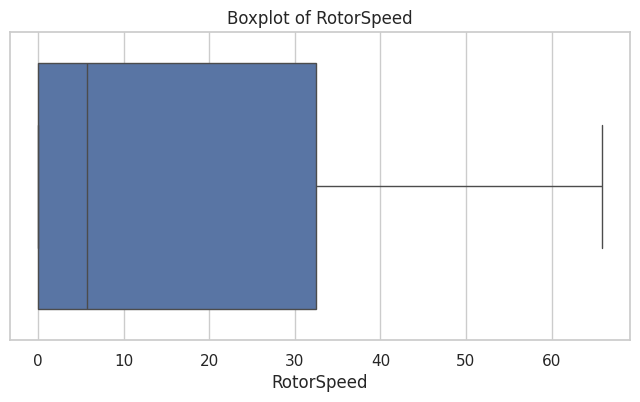

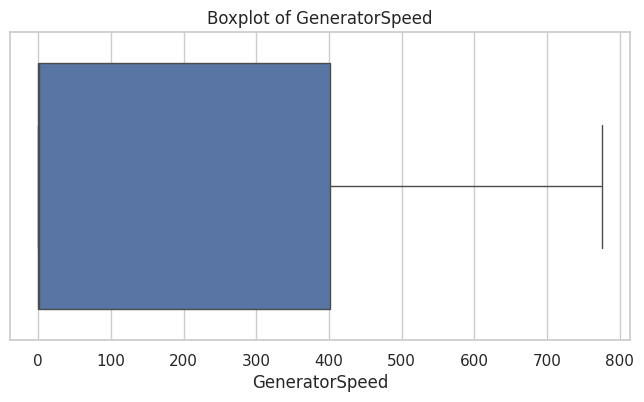

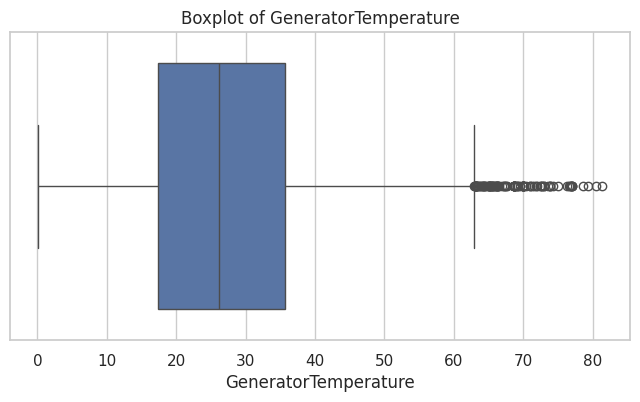

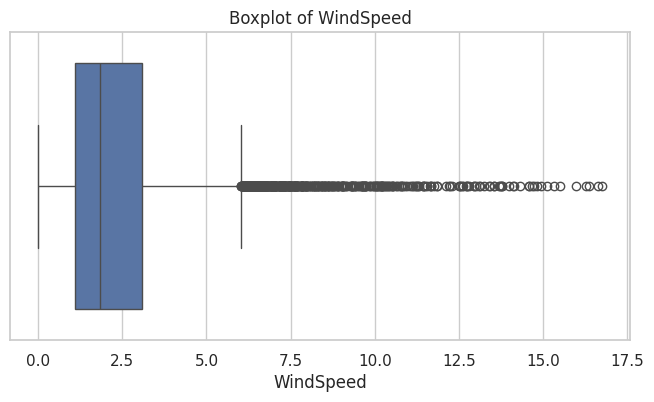

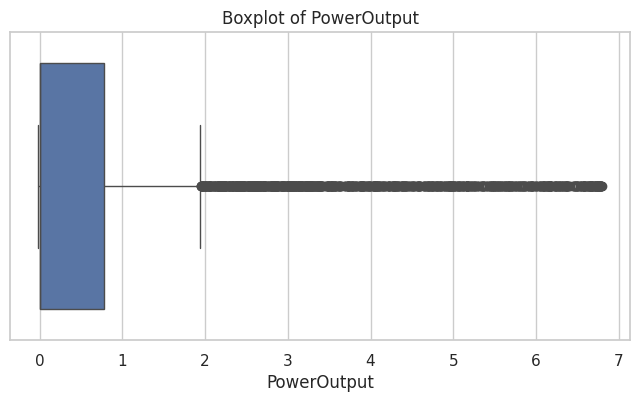

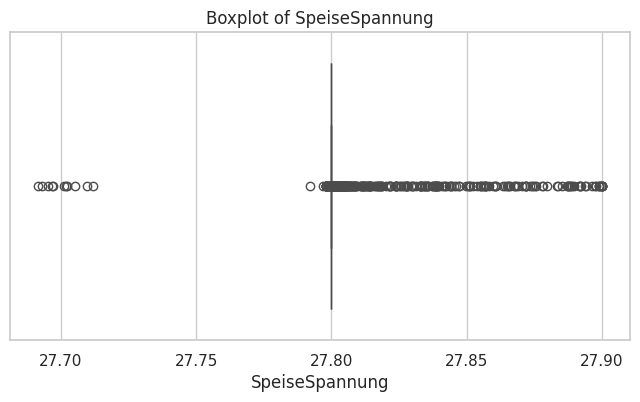

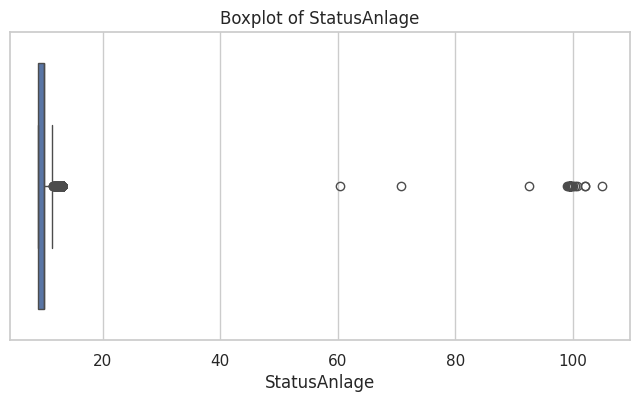

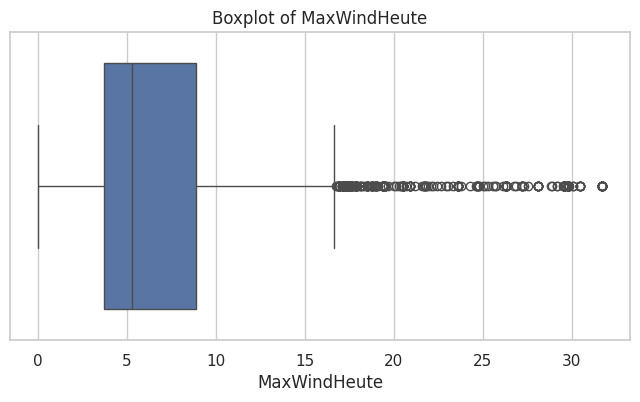

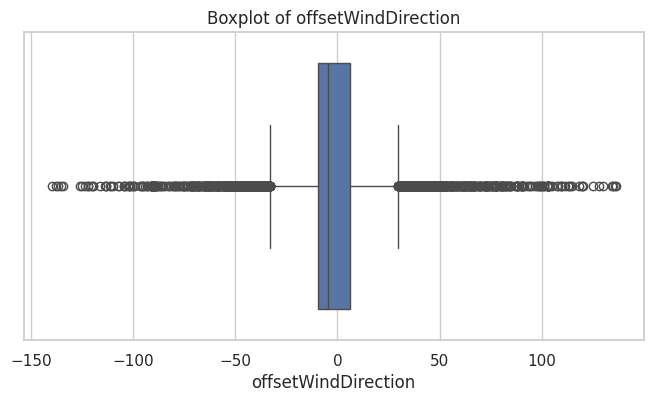

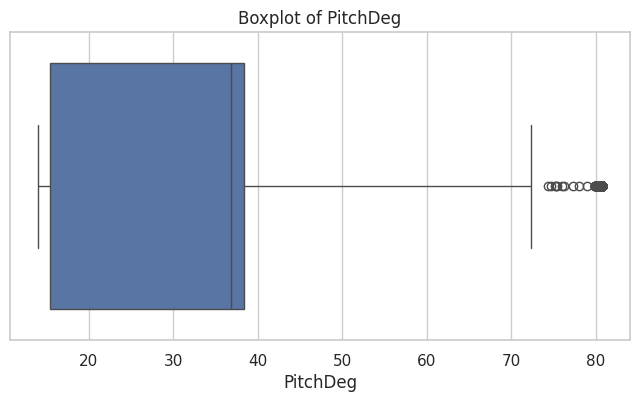

In [22]:
# List of numerical columns in air_quality dataset
numerical_columns = wind_turbine.select_dtypes(include=['float64', 'int64']).columns

# Initial Outlier Visualization
print("Initial Outlier Visualization:")
plot_boxplots(wind_turbine, numerical_columns)

In [23]:
wind_turbine = handle_outliers(wind_turbine, numerical_columns, method='cap')

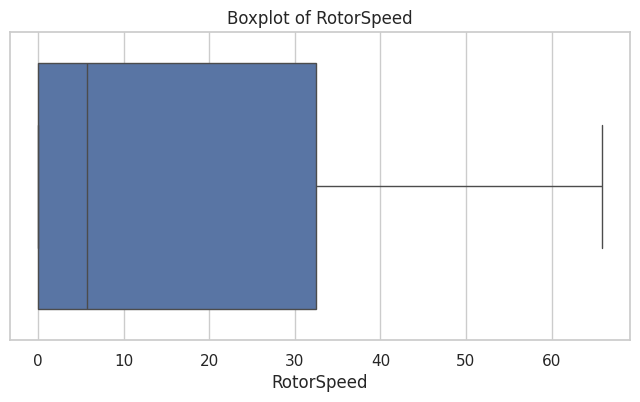

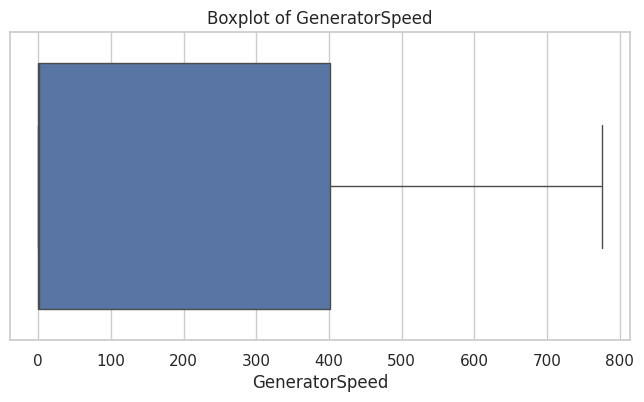

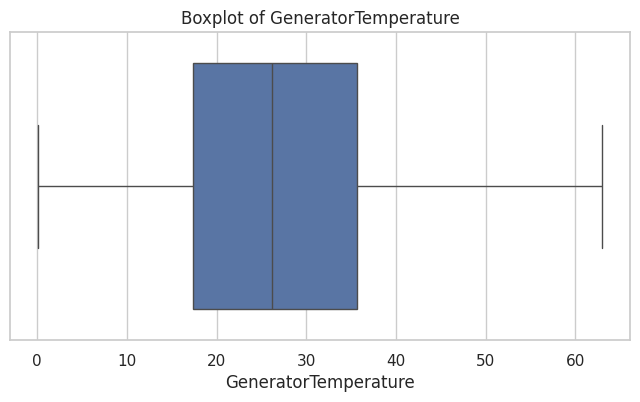

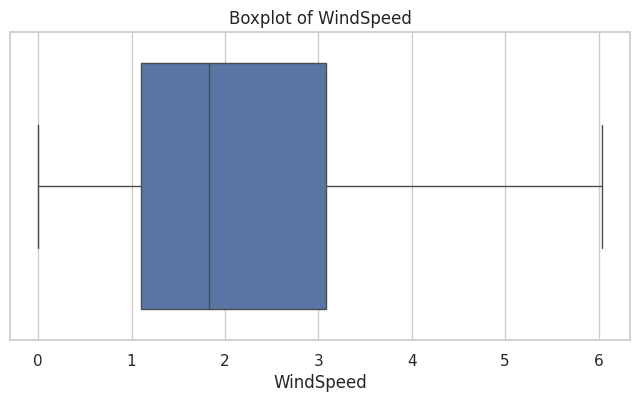

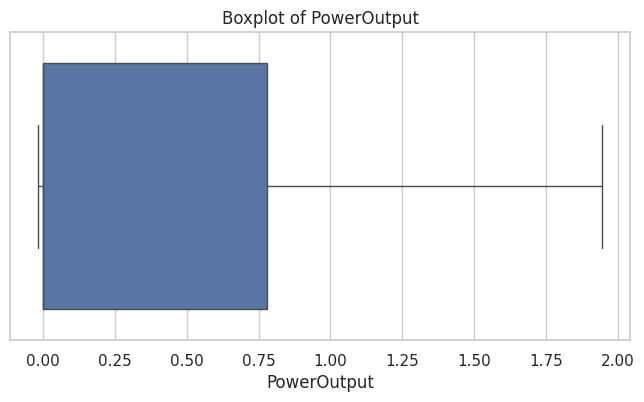

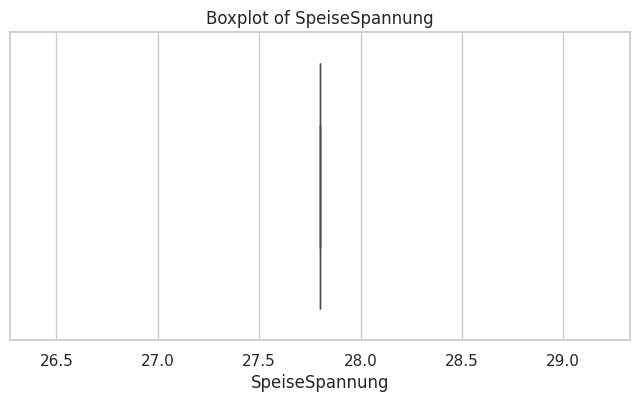

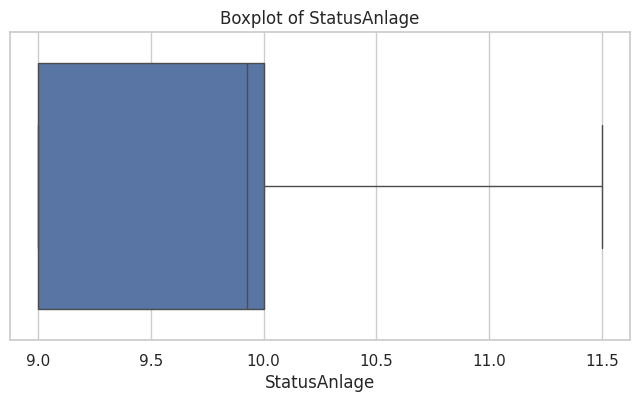

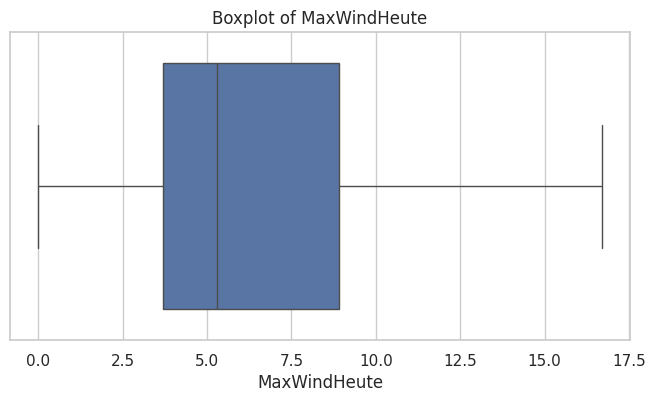

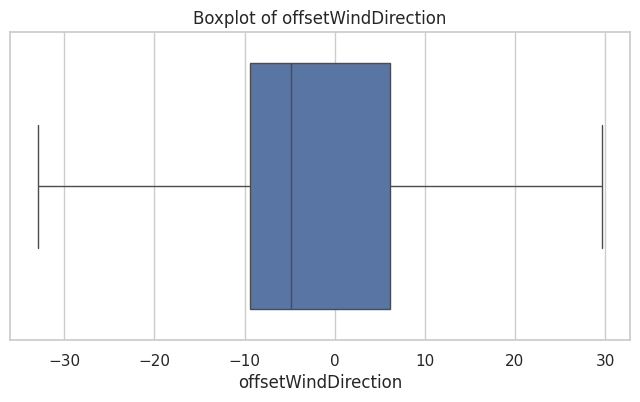

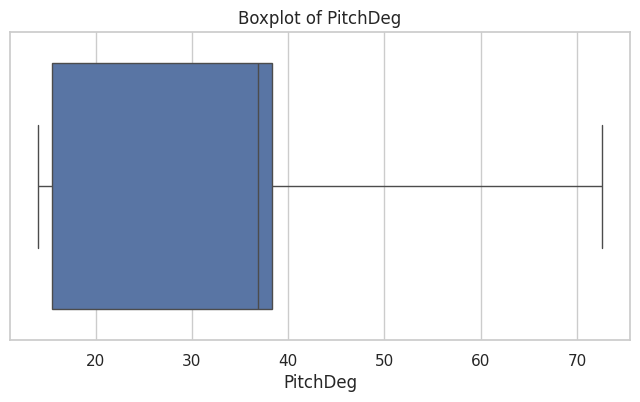

In [24]:
plot_boxplots(wind_turbine, numerical_columns)

### Outlier Handling Strategy for Wind Turbine and Temperature Data

For the wind turbine data (temp_braz), we opted for robust scaling to handle outliers because this dataset includes environmental parameters like temperature and humidity, which exhibit natural variability critical for accurate environmental analysis. Robust scaling allowed us to reduce the influence of extreme values without removing or capping them, preserving the full range of environmental behaviors, including seasonal or atmospheric shifts. This choice was crucial to maintain the integrity of natural patterns and ensure that our model could learn from both normal and extreme values—an essential aspect for environmental forecasting, where outliers often represent meaningful data rather than noise.

Conversely, in the wind turbine operational data, we observed that variables such as RotorSpeed—our chosen target variable—demonstrate consistent, predictable patterns with occasional spikes. Since these outliers represent operational peaks rather than inherent environmental variability, capping became the most suitable approach. By capping rather than scaling, we maintained the data’s original distribution, which is key to understanding and predicting turbine performance accurately. The robust scaling used in the temp_braz dataset would not have been as appropriate here because we prioritized keeping operational data interpretable and directly relevant to turbine performance without altering the scale.

**Summary of Approach:**

- For temperature data (temp_braz), robust scaling was essential to retain natural variability and preserve environmental integrity, especially since extreme values carry critical information.
- For wind turbine data, capping effectively handled operational outliers without skewing or altering the data scale, allowing for realistic and interpretable insights specific to turbine operations.

This nuanced approach allows us to address the distinct needs of each dataset while ensuring our models learn from meaningful patterns without distorting natural or operational information.



## 2.4 Collinearity & Correlation Analysis:

### 2.4.1  Weak Y Correlation Treatment

In [25]:
wind_turbine = drop_weakly_correlated_features(wind_turbine, 'RotorSpeed', threshold=0.1)


Dropping weakly correlated features: []


### 2.4.2 Colinearity Treatment

In [26]:
print(bold_start,bullet_start,"Column Names:\n", style_end, wind_turbine.columns)

 •  Column Names:
  Index(['RotorSpeed', 'GeneratorSpeed', 'GeneratorTemperature', 'WindSpeed',
       'PowerOutput', 'SpeiseSpannung', 'StatusAnlage', 'MaxWindHeute',
       'offsetWindDirection', 'PitchDeg'],
      dtype='object')


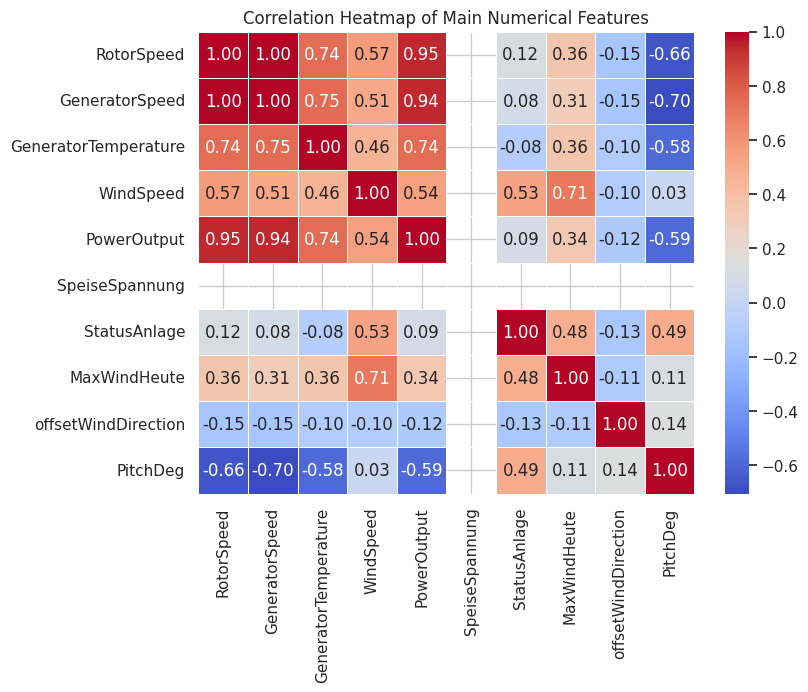

Highly Correlated Pairs: [('RotorSpeed', 'GeneratorSpeed'), ('RotorSpeed', 'PowerOutput'), ('GeneratorSpeed', 'RotorSpeed'), ('GeneratorSpeed', 'PowerOutput'), ('PowerOutput', 'RotorSpeed'), ('PowerOutput', 'GeneratorSpeed')]


In [27]:
valuable_columns = wind_turbine.select_dtypes(include=['float64', 'int64']).columns
# Calculate correlation matrix for selected numerical features
correlation_matrix = wind_turbine[valuable_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Main Numerical Features")
plt.show()

# Identify highly correlated features (absolute correlation > 0.8) among main numerical columns
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8]
print("Highly Correlated Pairs:", high_corr_pairs)

#### Multicollinearity Analysis and Feature Selection

In examining the correlation heatmap, we observe significant multicollinearity among certain features, particularly between RotorSpeed, GeneratorSpeed, and PowerOutput. These high correlations confirm that these features share substantial overlapping information. Given that RotorSpeed and GeneratorSpeed are tightly linked to turbine operation dynamics, with RotorSpeed showing almost a perfect correlation with PowerOutput, it reinforces our previous rationale for choosing RotorSpeed as the target variable.

**This choice is strategic for a few reasons:**

- **Redundancy Reduction:** Retaining both GeneratorSpeed and PowerOutput would add redundancy without new insights, as their variations are already captured by RotorSpeed.

- **Enhanced Model Focus:** By focusing on RotorSpeed as the primary target and eliminating the redundant features, the model can more efficiently learn from data patterns, reducing noise from repetitive information.

- **Interpretability:** Keeping only RotorSpeed simplifies interpretability by reducing the dimensionality of similar variables, allowing clearer insights into the turbine’s operational behavior.

In line with these insights, we will retain RotorSpeed while excluding GeneratorSpeed and PowerOutput in our modeling process, aiming for a streamlined dataset that maximizes the relevance of each feature without unnecessary overlap. This decision supports a cleaner, more focused data representation, enhancing both model efficiency and interpretability.

In [28]:
columns_to_drop = ['GeneratorSpeed', 'PowerOutput']
wind_turbine = wind_turbine.drop(columns=columns_to_drop)

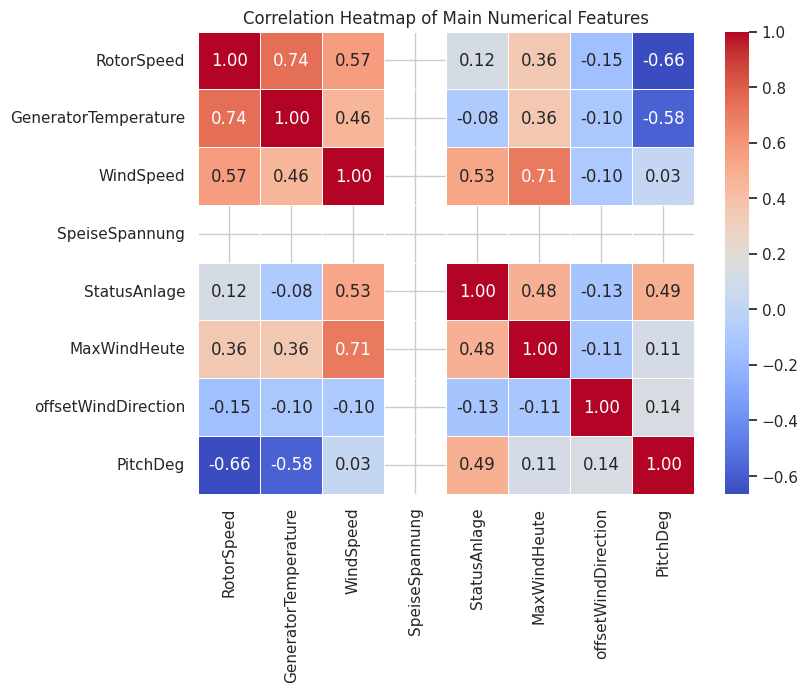

Highly Correlated Pairs: []


In [29]:
valuable_columns = wind_turbine.select_dtypes(include=['float64']).columns
# Calculate correlation matrix for selected numerical features
correlation_matrix = wind_turbine[valuable_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Main Numerical Features")
plt.show()

# Identify highly correlated features (absolute correlation > 0.8) among main numerical columns
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8]
print("Highly Correlated Pairs:", high_corr_pairs)

In [30]:
check(wind_turbine,20)

,RotorSpeed,GeneratorTemperature,WindSpeed,SpeiseSpannung,StatusAnlage,MaxWindHeute,offsetWindDirection,PitchDeg
Datetime,,,,,,,,
2021-12-31 23:00:00,0.128476,11.410095,0.010011,27.8,11.5,0.289572,8.953003,72.585166
2022-01-01 00:00:00,0.964534,10.643004,0.140473,27.8,11.5,0.444673,-5.931572,72.585166
2022-01-01 01:00:00,0.194438,10.613765,0.070106,27.8,11.5,2.200000,8.355673,72.585166
2022-01-01 02:00:00,0.794549,10.107814,0.052058,27.8,11.5,2.200000,-7.882925,72.585166
2022-01-01 03:00:00,0.010484,9.638459,0.002503,27.8,11.5,2.200000,10.609010,72.585166
2022-01-01 04:00:00,0.000000,8.811241,0.005008,27.8,11.5,2.200000,22.175849,72.585166
2022-01-01 05:00:00,0.000000,8.168804,0.007444,27.8,11.5,2.200000,-3.008364,72.585166
2022-01-01 06:00:00,0.133640,7.678149,0.005017,27.8,11.5,2.200000,16.780100,72.585166
2022-01-01 07:00:00,0.000000,6.948509,0.010036,27.8,11.5,2.200000,12.945637,72.585166


## 2.5 Feature Engineering

### 2.5.1 Interaction Feature Creation:

#### 2.5.1.1 Initial Interaction Features List:

##### Rationale for Interaction Features
Creating interaction features is essential for this dataset, as turbine performance depends on complex relationships between environmental conditions and mechanical attributes. Here’s why each interaction feature is valuable:

- **Temperature-Wind Interaction (GeneratorTemperature * WindSpeed):**
Generator temperature is often affected by external factors like wind speed, which can either cool or intensify heat depending on operational intensity. This interaction helps us see how wind influences the temperature dynamics within the generator, a factor closely tied to efficiency. For instance, cooler conditions could mean prolonged generator life and consistent energy output, which is crucial for maintenance insights.

- **MaxWind-Pitch Interaction (MaxWindHeute * PitchDeg):**
The maximum wind speed of the day interacting with the blade pitch angle gives insight into how the system adjusts to extreme wind conditions. Higher pitch angles are typically used to reduce rotor speed and protect the turbine in very high winds. This feature could reveal how the turbine responds to safety measures, impacting operational efficiency and resilience under stress.

- **Voltage-Temperature Interaction (SpeiseSpannung * GeneratorTemperature):**
This interaction feature captures the relationship between the feeding voltage and generator temperature. Voltage stability is crucial in maintaining optimal generator temperature and performance. High voltage combined with elevated temperatures may indicate potential stress on the system, and identifying these interactions could help in preventive maintenance strategies and in understanding system vulnerabilities.

These interaction features are carefully selected to capture meaningful dynamics within the turbine system. By combining physical and operational aspects, they provide nuanced insights into the turbine’s adaptability, resilience, and efficiency under varying conditions. This approach not only strengthens predictive modeling but also enriches our understanding of the interplay between environmental forces and turbine mechanics, ensuring our model is grounded in the turbine’s real-world context.

In [31]:
# we create interaction features to capture relationships between core variables
wind_turbine['Temp_Wind_Interaction'] = wind_turbine['GeneratorTemperature'] * wind_turbine['WindSpeed']
wind_turbine['MaxWind_Pitch_Interaction'] = wind_turbine['MaxWindHeute'] * wind_turbine['PitchDeg']
wind_turbine['Voltage_Temp_Interaction'] = wind_turbine['SpeiseSpannung'] * wind_turbine['GeneratorTemperature']

#### 2.5.1.2 Interaction Features Correlation Evaluation:

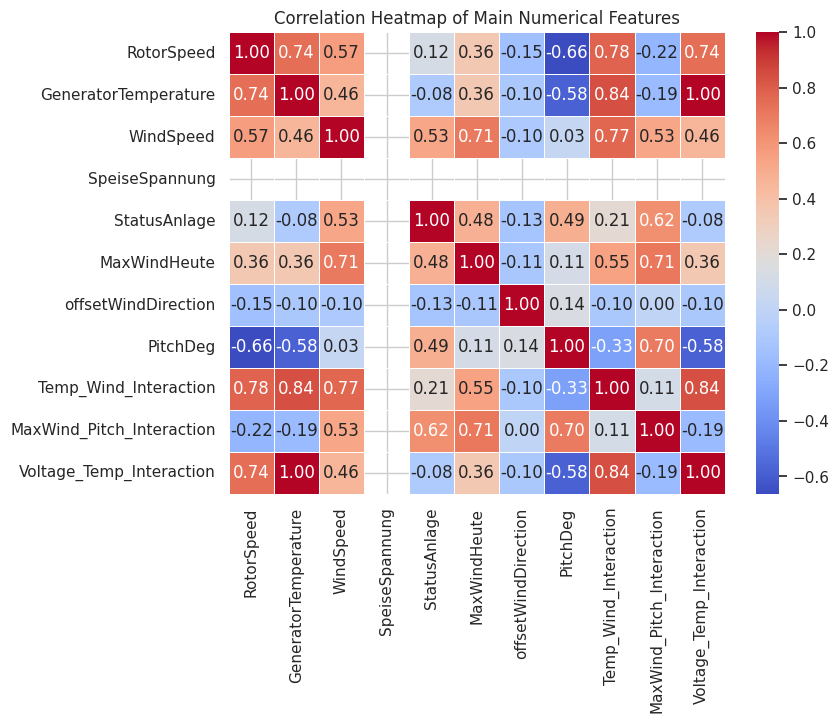

Highly Correlated Pairs: [('GeneratorTemperature', 'Temp_Wind_Interaction'), ('GeneratorTemperature', 'Voltage_Temp_Interaction'), ('Temp_Wind_Interaction', 'GeneratorTemperature'), ('Temp_Wind_Interaction', 'Voltage_Temp_Interaction'), ('Voltage_Temp_Interaction', 'GeneratorTemperature'), ('Voltage_Temp_Interaction', 'Temp_Wind_Interaction')]


In [32]:
valuable_columns = wind_turbine.select_dtypes(include=['float64']).columns
# Calculate correlation matrix for selected numerical features
correlation_matrix = wind_turbine[valuable_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Main Numerical Features")
plt.show()

# Identify highly correlated features (absolute correlation > 0.8) among main numerical columns
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8]
print("Highly Correlated Pairs:", high_corr_pairs)

#### 2.5.1.3 Relevant Interaction Features Selection

The correlation heatmap for the new interaction features alongside the original variables reveals some significant relationships.

- Temp_Wind_Interaction & Voltage_Temp_Interaction: These two interaction features are highly correlated with each other and with GeneratorTemperature. This is expected since both interactions involve temperature, which influences turbine performance and is related to environmental changes. However, the high correlation might indicate redundancy between these interaction features. Given that temperature-based interactions are sensitive to generator dynamics, retaining both might introduce multicollinearity.

- RotorSpeed & Temp_Wind_Interaction: The strong correlation here makes sense, as rotor speed naturally depends on wind speed and temperature conditions. This interaction could be a meaningful feature for our model, representing the combined effect of environmental factors on the rotor's performance.

- MaxWind_Pitch_Interaction & WindSpeed: This interaction feature has a moderate correlation with WindSpeed and MaxWindHeute. Since pitch and wind speed are crucial in adjusting turbine efficiency under varying wind conditions, this feature may capture nuanced behaviors, especially in turbulent wind scenarios.

**Decision and Next Steps**

- Retain Key Interactions: Based on the above insights, we will keep the Temp_Wind_Interaction for its unique blend of temperature and wind, which impacts turbine dynamics and rotor speed directly.

- Drop Redundant Interactions: Given the high correlation and potential redundancy, we should consider dropping Voltage_Temp_Interaction to reduce multicollinearity.

- Refine Feature Selection: By focusing on meaningful interactions, we ensure our model captures real-world turbine behavior without unnecessary complexity. This balance between complexity and interpretability is essential in understanding and predicting turbine performance under different environmental conditions.

In [33]:
columns_to_drop = ['Voltage_Temp_Interaction']  # Dropping due to high multicollinearity with other features
wind_turbine.drop(columns=columns_to_drop, inplace=True)

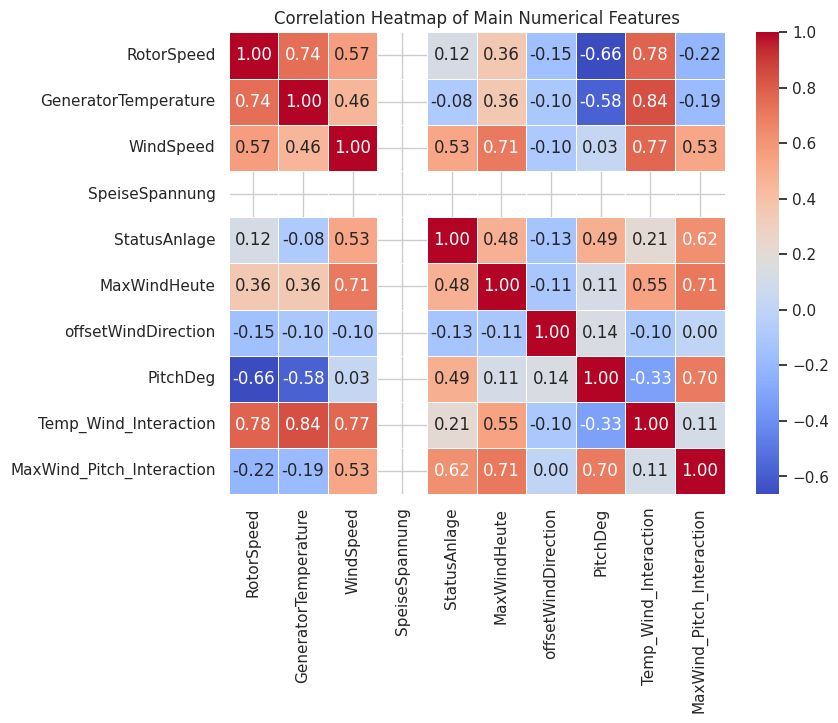

Highly Correlated Pairs: [('GeneratorTemperature', 'Temp_Wind_Interaction'), ('Temp_Wind_Interaction', 'GeneratorTemperature')]


In [34]:
valuable_columns = wind_turbine.select_dtypes(include=['float64']).columns
# Calculate correlation matrix for selected numerical features
correlation_matrix = wind_turbine[valuable_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Main Numerical Features")
plt.show()

# Identify highly correlated features (absolute correlation > 0.8) among main numerical columns
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8]
print("Highly Correlated Pairs:", high_corr_pairs)

### 2.5.2 Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns to scale (excluding one-hot encoded dummies)
numerical_columns = wind_turbine.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
wind_turbine.loc[:, numerical_columns] = scaler.fit_transform(wind_turbine[numerical_columns])

print("Scaled numerical features")
print(wind_turbine[numerical_columns].head())

Scaled numerical features
                     RotorSpeed  GeneratorTemperature  WindSpeed  \
Datetime                                                           
2021-12-31 23:00:00   -0.829801             -1.128697  -1.386730   
2022-01-01 00:00:00   -0.788480             -1.182950  -1.305757   
2022-01-01 01:00:00   -0.826541             -1.185018  -1.349432   
2022-01-01 02:00:00   -0.796881             -1.220802  -1.360633   
2022-01-01 03:00:00   -0.835633             -1.253997  -1.391390   

                     SpeiseSpannung  StatusAnlage  MaxWindHeute  \
Datetime                                                          
2021-12-31 23:00:00   -7.105427e-15      1.810108     -1.529185   
2022-01-01 00:00:00   -7.105427e-15      1.810108     -1.492320   
2022-01-01 01:00:00   -7.105427e-15      1.810108     -1.075115   
2022-01-01 02:00:00   -7.105427e-15      1.810108     -1.075115   
2022-01-01 03:00:00   -7.105427e-15      1.810108     -1.075115   

                     offset

# 3. Final Data Inspection & Validation

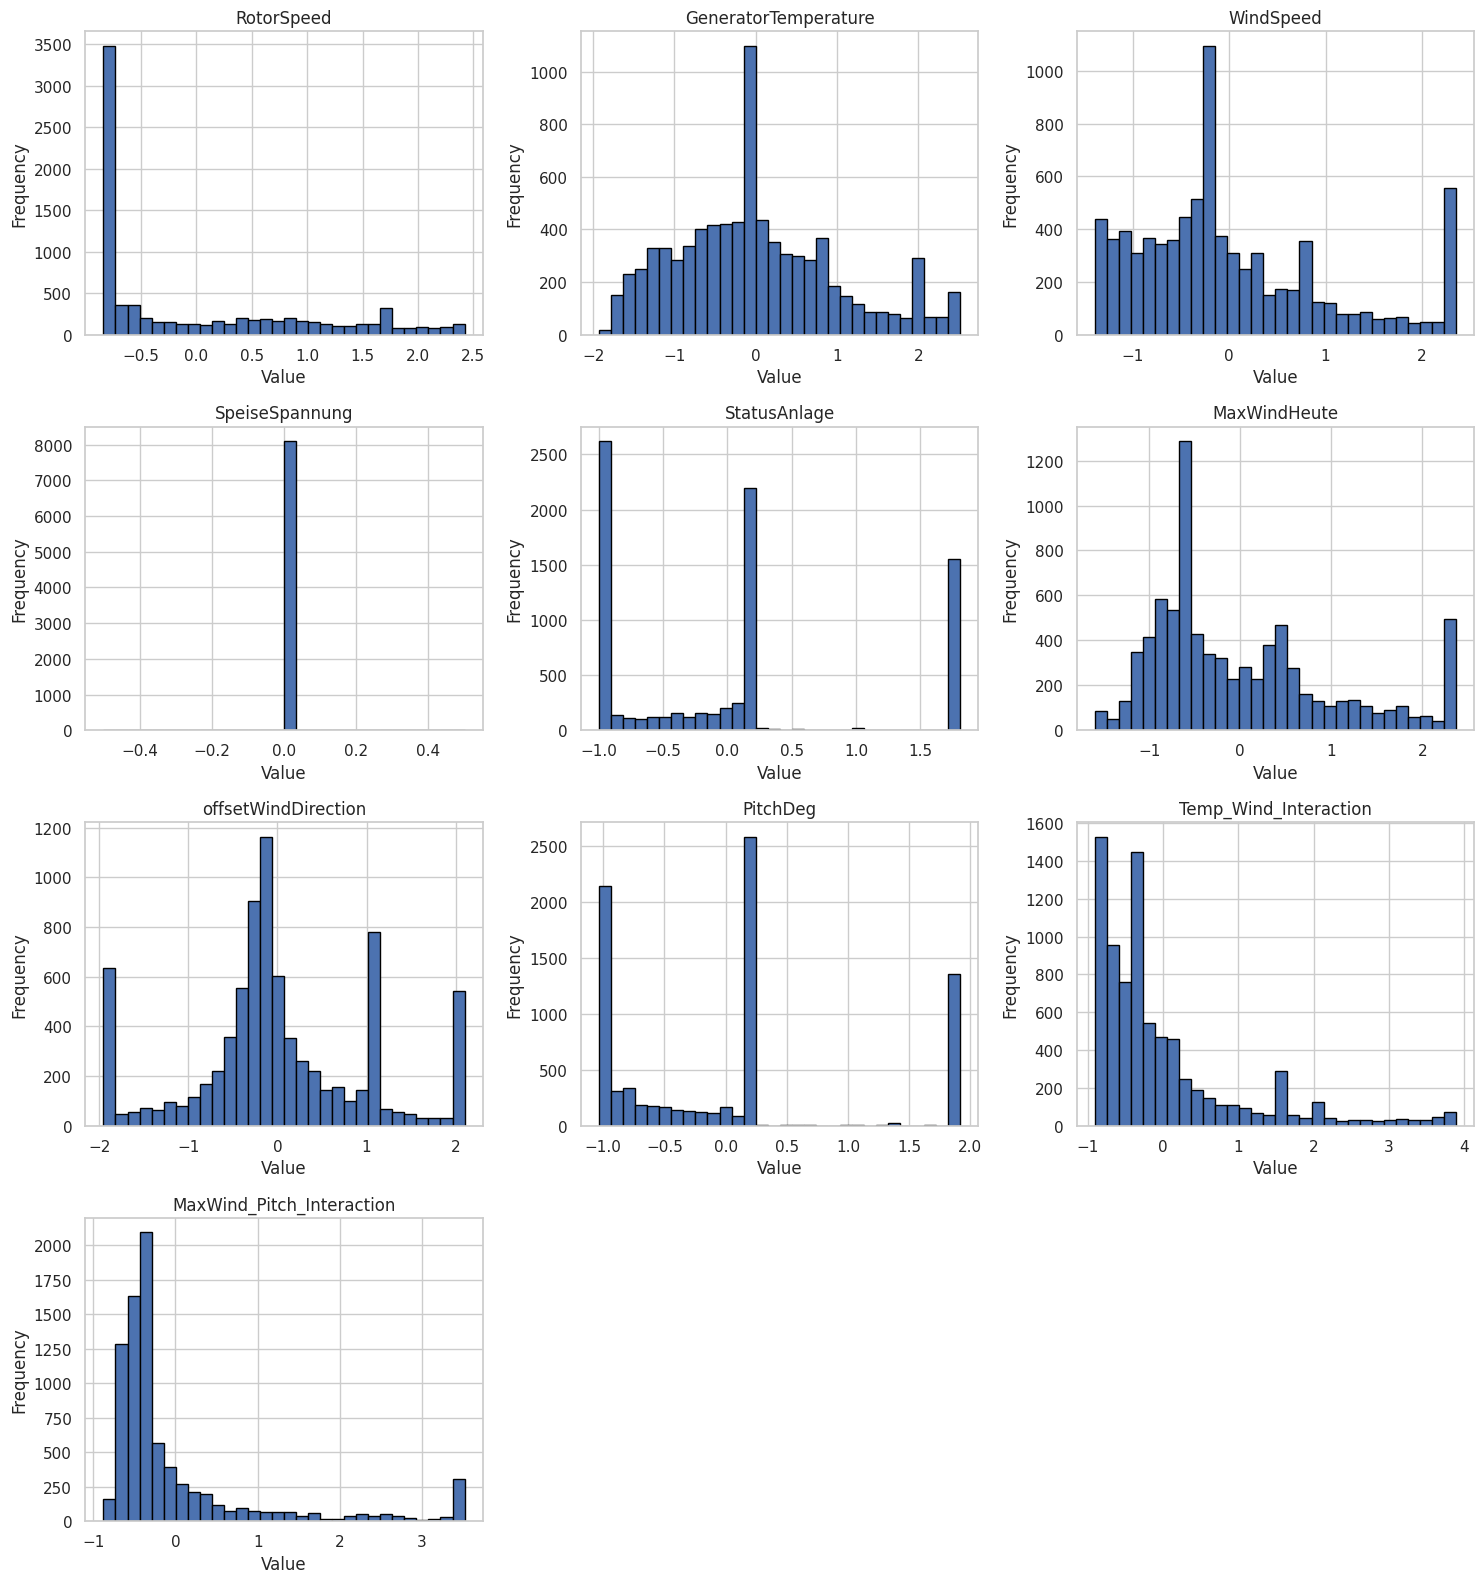

In [36]:
plot_numeric_histograms(wind_turbine)


In [37]:
missing_summ(wind_turbine)

Series([], dtype: int64)


,0


In [38]:
check(wind_turbine,20)

,RotorSpeed,GeneratorTemperature,WindSpeed,SpeiseSpannung,StatusAnlage,MaxWindHeute,offsetWindDirection,PitchDeg,Temp_Wind_Interaction,MaxWind_Pitch_Interaction
Datetime,,,,,,,,,,
2021-12-31 23:00:00,-0.829801,-1.128697,-1.386730,-7.105427e-15,1.810108,-1.529185,0.758729,1.917284,-0.905204,-0.800238
2022-01-01 00:00:00,-0.788480,-1.182950,-1.305757,-7.105427e-15,1.810108,-1.492320,-0.206279,1.917284,-0.887777,-0.759418
2022-01-01 01:00:00,-0.826541,-1.185018,-1.349432,-7.105427e-15,1.810108,-1.075115,0.720002,1.917284,-0.897255,-0.297449
2022-01-01 02:00:00,-0.796881,-1.220802,-1.360633,-7.105427e-15,1.810108,-1.075115,-0.332790,1.917284,-0.900005,-0.297449
2022-01-01 03:00:00,-0.835633,-1.253997,-1.391390,-7.105427e-15,1.810108,-1.075115,0.866093,1.917284,-0.906341,-0.297449
2022-01-01 04:00:00,-0.836151,-1.312503,-1.389835,-7.105427e-15,1.810108,-1.075115,1.616002,1.917284,-0.906089,-0.297449
2022-01-01 05:00:00,-0.836151,-1.357940,-1.388324,-7.105427e-15,1.810108,-1.075115,-0.016759,1.917284,-0.905878,-0.297449
2022-01-01 06:00:00,-0.829546,-1.392642,-1.389830,-7.105427e-15,1.810108,-1.075115,1.266181,1.917284,-0.906160,-0.297449
2022-01-01 07:00:00,-0.836151,-1.444246,-1.386715,-7.105427e-15,1.810108,-1.075115,1.017582,1.917284,-0.905766,-0.297449


# 4. Final Dataset split & Export

In [39]:
# Saving the finalized dataset after EDA to a new CSV file for direct loading in the modeling stage.

wind_turbine.to_csv("/content/drive/My Drive/Colab Notebooks/wind_turbine_final.csv", index=True)
print("Finalized dataset saved as 'wind_turbine_final.csv'")

Finalized dataset saved as 'wind_turbine_final.csv'


In [40]:
size(wind_turbine)

(8094, 10)